In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sys
import os
import scipy.io
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from scipy.spatial.distance import pdist

In [13]:
path = os.path.join(os.path.split(os.path.realpath('__file__'))[0])
sys.path.append(path)
path

'/content'

In [0]:
mat = []
dirname = "/content/drive/My Drive/学习/学习资料/Semester 3/GR5243--applied data science/project3/train_set/points"
for f in sorted(os.listdir("/content/drive/My Drive/学习/学习资料/Semester 3/GR5243--applied data science/project3/train_set/points")):
    mat.append(scipy.io.loadmat(os.path.join(dirname,f)))

label_file = pd.read_csv("/content/drive/My Drive/学习/学习资料/Semester 3/GR5243--applied data science/project3/train_set/label.csv")

In [0]:
pattern = re.compile(r'face*')
coords = [x[list(filter(pattern.match, x.keys()))[0]] for x in mat]

In [0]:
feature_mat = np.array([pdist(x) for x in coords])
reduced_feature_mat = PCA(n_components=500).fit_transform(feature_mat)
label = np.asarray(label_file.loc[:, 'emotion_idx'])
#dataset = np.concatenate((feature_mat, label[:,np.newaxis]), axis=1)

In [0]:
# KNN

In [11]:
x = list(range(10,51,10))
y_knn = []
for k in range(10,51,10):
    cvs = cross_validate(RandomForestClassifier(k), feature_mat, label, cv=5, scoring='accuracy')
    print('run for k={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y_knn.append(np.mean(cvs['test_score']))

run for k=10,  with accuracy [0.34055118 0.39130435 0.35470942 0.23790323 0.23217923]
run for k=20,  with accuracy [0.39566929 0.40909091 0.33867735 0.27822581 0.2586558 ]
run for k=30,  with accuracy [0.38976378 0.42490119 0.38076152 0.28629032 0.29124236]
run for k=40,  with accuracy [0.45866142 0.44664032 0.39078156 0.29032258 0.27494908]
run for k=50,  with accuracy [0.45866142 0.46640316 0.41282565 0.30040323 0.30346232]


In [0]:
plt.plot(x, y)

In [0]:
# Random Forest

In [0]:
x = list(range(10,51,10))
y = []
for k in range(10,51,10):
    cvs = cross_validate(RandomForestClassifier(k), feature_mat, label, cv=5, scoring='accuracy')
    print('run for k={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y.append(np.mean(cvs['test_score']))

In [0]:
plt.plot(x, y)

In [0]:
# GBM

In [13]:
x = list(range(10,51,10))
y_gbm = []
for k in range(60,130,10):
    cvs = cross_validate(GradientBoostingClassifier(n_estimators=k,validation_fraction=0.2,
                                               n_iter_no_change=5, tol=0.01), feature_mat, label, cv=3, scoring='accuracy')
    print('run for n_estimators={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y_gbm.append(np.mean(cvs['test_score']))

run for n_estimators=80,  with accuracy [0.38168847 0.37454982 0.19854722]
run for n_estimators=90,  with accuracy [0.40071344 0.35054022 0.21912833]
run for n_estimators=100,  with accuracy [0.40665874 0.35894358 0.18644068]


In [0]:
x = list(range(60,101,10))
y_gbm = []
for k in range(60,130,10):
    cvs = cross_validate(GradientBoostingClassifier(n_estimators=k,validation_fraction=0.2,
                                               n_iter_no_change=5, tol=0.01), feature_mat, label, cv=3, scoring='accuracy')
    print('run for n_estimators={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y_gbm.append(np.mean(cvs['test_score']))

run for n_estimators=60,  with accuracy [0.40071344 0.36854742 0.2094431 ]
run for n_estimators=70,  with accuracy [0.38168847 0.36734694 0.21186441]


In [10]:
x = list(range(60,101,10))
y_gbm = []
for k in range(40,60,10):
    cvs = cross_validate(GradientBoostingClassifier(n_estimators=k,validation_fraction=0.2,
                                               n_iter_no_change=5, tol=0.01), feature_mat, label, cv=3, scoring='accuracy')
    print('run for n_estimators={}, '.format(k),'with accuracy {}'.format(cvs['test_score']))
    y_gbm.append(np.mean(cvs['test_score']))

NameError: ignored

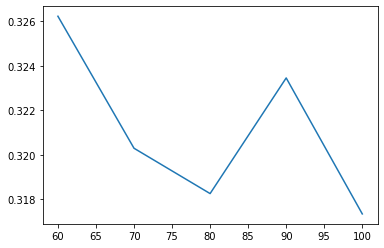

In [8]:
x = list(range(60,101,10))
n60=[0.40071344,0.36854742,0.2094431]
n70=[0.38168847,0.36734694,0.21186441]
n80=[0.38168847,0.37454982,0.19854722]
n90=[0.40071344,0.35054022,0.21912833]
n100=[0.40665874,0.35894358,0.18644068]
y=[np.mean(n60),np.mean(n70),np.mean(n80),np.mean(n90),np.mean(n100)]
plt.plot(x,y)



In [9]:
np.mean(n90)

0.3234606633333333